# [1주차] 머신러닝의 이해: 데이터로 생각하는 법의 시작 🤖

안녕하세요! '머신러닝의 이해' 첫 번째 시간에 오신 것을 환영합니다.

오늘은 머신러닝이 무엇인지, 그리고 어떤 종류가 있는지 큰 그림을 그려보는 시간을 갖겠습니다.

복잡한 수식이나 코드는 잠시 잊고, '개념'과 '아이디어'를 중심으로 즐겁게 따라와 주세요!

## 🧠 모듈 1: 머신러닝 vs. 전통적인 프로그래밍

- **전통적인 프로그래밍**
  - **사람**이 직접 규칙(Rule)과 데이터를 컴퓨터에 입력하면, 컴퓨터는 **정답**을 출력합니다.
  - 예: "만약 이메일 제목에 '광고'라는 단어가 있으면, 스팸으로 분류해!"

- **머신러닝 (Machine Learning)**
  - **데이터**와 그에 맞는 **정답**을 함께 컴퓨터에 입력하면, 컴퓨터가 스스로 **규칙**을 찾아냅니다.
  - 이 '규칙'을 우리는 **모델(Model)** 이라고 부릅니다.
  - 예: 수만 개의 스팸 메일과 정상 메일을 보여주면, 기계가 스스로 스팸을 구분하는 새로운 규칙을 학습합니다.

## 📚 모듈 2: 머신러닝의 세 가지 학습법

### 1. 지도 학습 (Supervised Learning)
- **핵심 아이디어**
  * **연습**(Training Data)을 통해 학습하고, **시험**(Test Data)으로 평가받는 과정입니다.
- **지도 학습 과정**
  * '문제'와 '정답'이 있는 **연습 문제**를 통해 학습합니다.
  * 학습이 끝난 후, 한 번도 연습한 적 없는 **시험 문제**를 얼마나 잘 맞히는지 평가합니다.
    * 모델이 단순히 답을 외운 것이 아니라, 문제 해결 능력을 갖췄는지 확인하는 과정입니다.

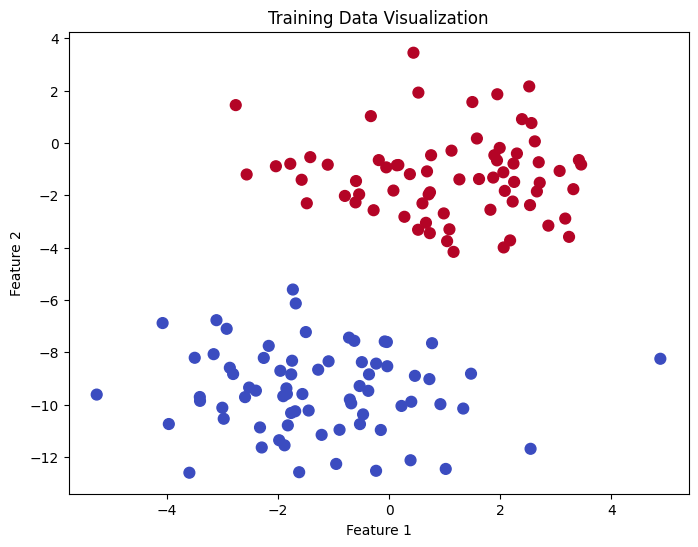

총 데이터: 200개
연습 문제: 140개
실전 시험: 60개


In [45]:
# 라이브러리 임포트
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# 불필요한 경고문구 숨기기
import warnings
warnings.filterwarnings(action='ignore')


# 전체 데이터 생성
X, y = make_blobs(n_samples=200, centers=2, random_state=2, cluster_std=1.5)

# 데이터를 '연습 문제(train)'와 '실전 시험(test)'으로 7:3 분리
(X_train, X_test,
 y_train, y_test) = train_test_split(X, y, test_size=0.3, random_state=42)

# 문제 상황 시각화 (모델은 '연습 문제'만 볼 수 있습니다)
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', s=60)
plt.title("Training Data Visualization")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.show()

print(f"총 데이터: {len(X)}개")
print(f"연습 문제: {len(X_train)}개")
print(f"실전 시험: {len(X_test)}개")

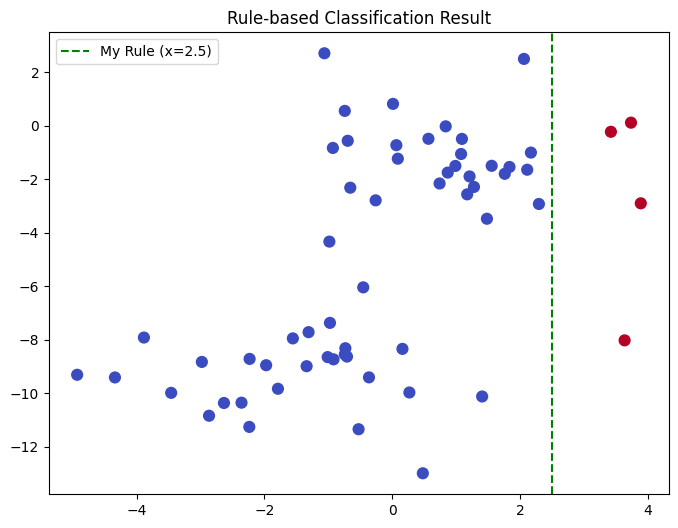

규칙 기반의 실전 시험 정확도: 51.67%


In [ ]:
# 사람이 '연습 문제'를 보고 규칙을 만듭니다.
# "특징 1(x축) 값이 2.5보다 작으면 0번, 크면 1번 그룹으로 하자!"

# 이 규칙을 '실전 시험' 데이터에 적용해봅니다.
rule_based_pred = (X_test[:, 0] > 2.5).astype(int)

# 결과 시각화
plt.figure(figsize=(8, 6))
# 규칙 기반 예측 결과(색)로 '실전 시험' 문제들을 표시
plt.scatter(X_test[:, 0], X_test[:, 1], c=rule_based_pred, cmap='coolwarm', s=60)
plt.axvline(x=2.5, color='green', linestyle='--', label='My Rule (x=2.5)')
plt.title("Rule-based Classification Result")
plt.legend()
plt.show()

# '실전 시험'의 실제 정답과 비교하여 정확도 계산
accuracy = np.mean(rule_based_pred == y_test)
print(f"규칙 기반의 실전 시험 정확도: {accuracy * 100:.2f}%")

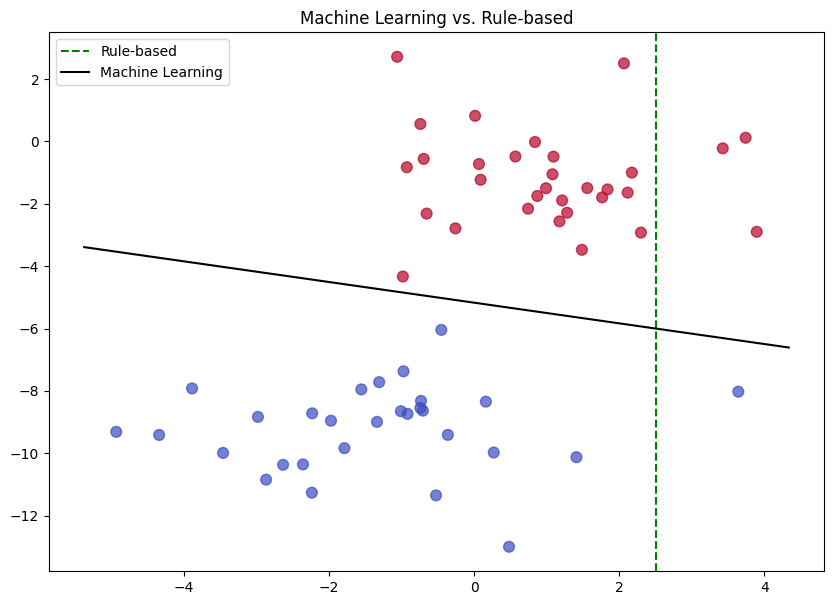

머신러닝의 실전 시험 정확도: 100.00% (처음 보는 문제도 더 잘 해결함)


In [46]:
from sklearn.linear_model import LogisticRegression

# 머신러닝 모델은 '연습 문제' 데이터로만 학습합니다.
model = LogisticRegression()
model.fit(X_train, y_train)

# 시각화하여 규칙 기반 방식과 비교
plt.figure(figsize=(10, 7))
# '실전 시험' 데이터의 실제 정답을 색으로 표시
plt.scatter(X_test[:, 0], X_test[:, 1],
            c=y_test, cmap='coolwarm',
            s=60, alpha=0.7)
plt.axvline(x=2.5, color='green', linestyle='--', label='Rule-based')
ax = plt.gca()
xlim = ax.get_xlim()
w = model.coef_[0]
a = -w[0] / w[1]
xx = np.linspace(xlim[0], xlim[1])
yy = a * xx - (model.intercept_[0]) / w[1]
plt.plot(xx, yy, c='black', label='Machine Learning')
plt.title("Machine Learning vs. Rule-based")
plt.legend()
plt.show()

accuracy = model.score(X_test, y_test)
print(f"머신러닝의 실전 시험 정확도: {accuracy * 100:.2f}% (처음 보는 문제도 더 잘 해결함)")

### 2. 비지도 학습 (Unsupervised Learning)
- **핵심 아이디어**
  * **'정답(레이블)'이 없는** 데이터만으로 학습하는 방식입니다.
- **비지도 학습 과정**
  * **연습 문제**를 통해 데이터의 숨겨진 구조(예: 그룹의 중심)를 파악합니다.
  * 이 구조를 바탕으로 **시험 문제**의 새로운 데이터가 어느 그룹에 속할지 분류합니다.

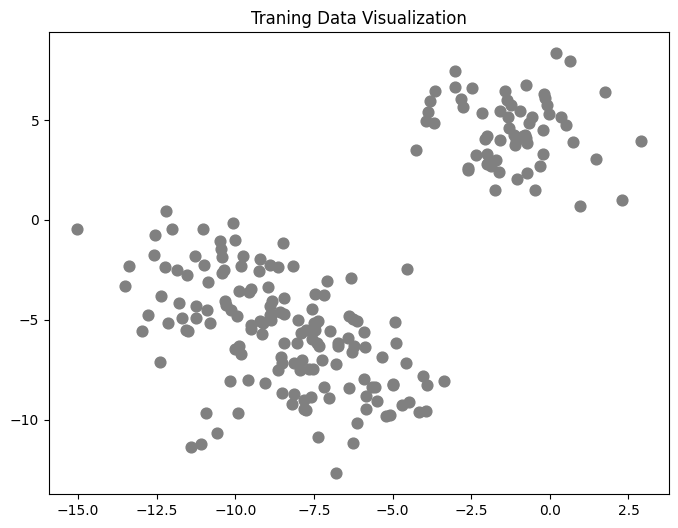

In [ ]:
from sklearn.cluster import KMeans

# 전체 데이터 생성 및 분리
X_un, _ = make_blobs(n_samples=300, centers=3,
                     random_state=1, cluster_std=1.8)
X_train_un, X_test_un, _, _ = train_test_split(X_un, np.zeros(300),
                                               test_size=0.3, random_state=42)

# 문제 상황 시각화 ('연습 문제'만 보여줌)
plt.figure(figsize=(8, 6))
plt.scatter(X_train_un[:, 0], X_train_un[:, 1], c='gray', s=60)
plt.title("Traning Data Visualization")
plt.show()

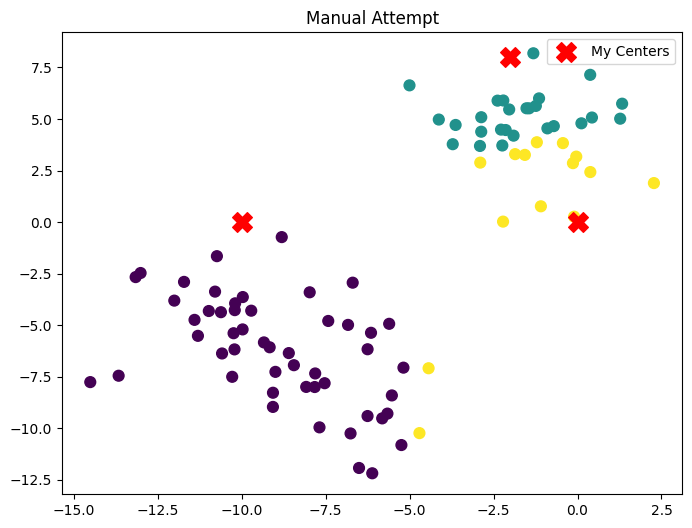

In [47]:
# 사람이 '연습 문제'를 보고 임의로 그룹의 중심점을 정합니다.
manual_centers = np.array([[-10, 0], [-2, 8], [0, 0]])

# 이 중심점 기준으로 '실전 시험' 데이터를 분류합니다.
distances = np.sqrt(((X_test_un - manual_centers[:, np.newaxis])**2).sum(axis=2))
manual_pred = np.argmin(distances, axis=0)

# 결과 시각화
plt.figure(figsize=(8, 6))
plt.scatter(X_test_un[:, 0], X_test_un[:, 1],
            c=manual_pred, cmap='viridis', s=60)
plt.scatter(manual_centers[:, 0], manual_centers[:, 1],
            s=200, c='red', marker='X', label='My Centers')
plt.title("Manual Attempt")
plt.legend()
plt.show()

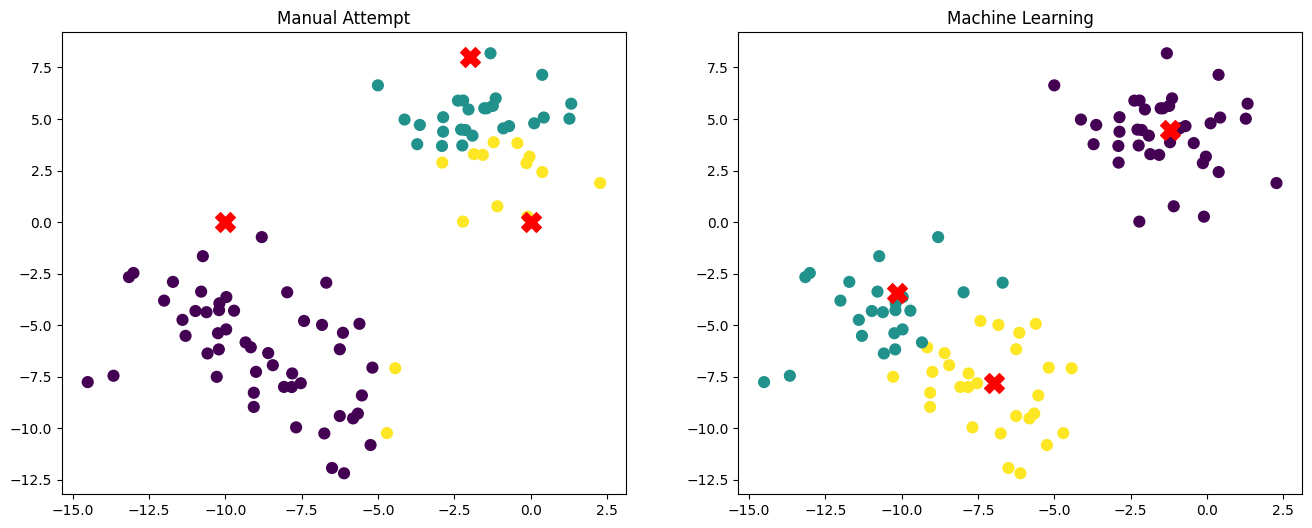

머신러닝이 '연습 문제'에서 학습한 정확한 중심점을 기준으로 '실전 시험' 문제들도 더 잘 분류합니다.


In [ ]:
# '연습 문제'로 그룹의 중심점을 학습
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_train_un)

# 학습된 모델로 '실전 시험' 데이터가 어느 그룹에 속하는지 예측
ml_pred = kmeans.predict(X_test_un)

# 시각화하여 수동 방식과 비교
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# 왼쪽: 수동 방식의 실전 시험 결과
ax1.scatter(X_test_un[:, 0], X_test_un[:, 1], c=manual_pred, cmap='viridis', s=60)
ax1.scatter(manual_centers[:, 0], manual_centers[:, 1],
            s=200, c='red', marker='X')
ax1.set_title("Manual Attempt")

# 오른쪽: 머신러닝의 실전 시험 결과
ax2.scatter(X_test_un[:, 0], X_test_un[:, 1], c=ml_pred, cmap='viridis', s=60)
ax2.scatter(kmeans.cluster_centers_[:, 0],
            kmeans.cluster_centers_[:, 1],
            s=200, c='red', marker='X')
ax2.set_title("Machine Learning")
plt.show()
print("머신러닝이 '연습 문제'에서 학습한 정확한 중심점을 기준으로 '실전 시험' 문제들도 더 잘 분류합니다.")

### 3. 강화 학습 (Reinforcement Learning)
- **핵심 아이디어**
  * **'정답'** 대신 **'보상'**(Reward)을 통해 학습하는 방식입니다.
- **강화 학습 과정**
  * **연습 환경**(Training Environment)에서 수많은 시행착오를 통해 최적의 행동 규칙(**정책, Policy**)을 학습합니다.
  * 이 정책을 **실전 상황**(Test Case)에 적용하여 최적의 행동을 합니다.

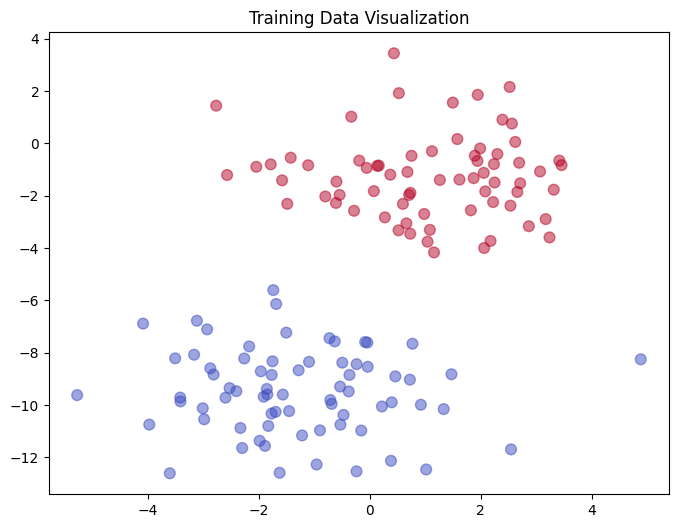

에이전트는 이 환경 속에서 수많은 점들을 만나며 보상/벌점을 통해 학습합니다.


In [ ]:
# 에이전트가 학습할 '연습 환경' 시각화 (지도학습의 train 데이터와 동일)
plt.figure(figsize=(8, 6))
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train,
            cmap='coolwarm', s=60, alpha=0.5)
plt.title("Training Data Visualization")
plt.show()
print("에이전트는 이 환경 속에서 수많은 점들을 만나며 보상/벌점을 통해 학습합니다.")

강화학습 완료! 각 공간 영역별 최적 행동(정책)이 Q-테이블에 저장되었습니다.


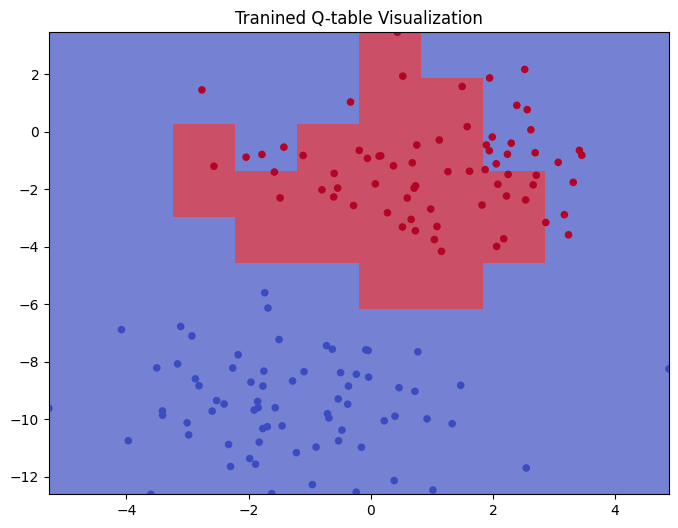

In [58]:
# Q-러닝 아이디어를 이용한 간단한 강화학습 구현
# 1. 상태(State) 정의: 공간을 격자로 나눔
grid_x = np.linspace(X_train[:, 0].min(), X_train[:, 0].max(), 10)
grid_y = np.linspace(X_train[:, 1].min(), X_train[:, 1].max(), 10)

# 2. Q-테이블 초기화: 각 격자(상태)에서 어떤 행동(0 또는 1)을 할지 가치를 저장하는 표
# 모든 행동의 가치를 0으로 시작
q_table = np.zeros((len(grid_x), len(grid_y), 2)) # (x격자, y격자, 행동[0,1])

# 3. 학습 파라미터
learning_rate = 0.1
n_episodes = 1000 # 학습 반복 횟수

# 4. 학습 시작
for episode in range(n_episodes):
    # 연습 문제 중 하나를 무작위로 선택
    idx = np.random.randint(len(X_train))
    state_pos, true_label = X_train[idx], y_train[idx]

    # 현재 위치가 어느 격자에 속하는지 찾기
    state_x_idx = np.digitize(state_pos[0], grid_x) - 1
    state_y_idx = np.digitize(state_pos[1], grid_y) - 1

    # 행동 선택 (가치가 높은 쪽을 선택)
    action = np.argmax(q_table[state_x_idx, state_y_idx])

    # 보상 계산
    reward = 1 if action == true_label else -1

    # Q-테이블 업데이트: 선택한 행동의 가치를 보상에 가깝게 조금씩 수정
    # Q(s,a) <- Q(s,a) + lr * (reward - Q(s,a))
    current_q = q_table[state_x_idx, state_y_idx, action]
    new_q = current_q + learning_rate * (reward - current_q)
    q_table[state_x_idx, state_y_idx, action] = new_q

print("강화학습 완료! 각 공간 영역별 최적 행동(정책)이 Q-테이블에 저장되었습니다.")

# 학습된 정책 시각화
learned_policy = np.argmax(q_table, axis=2)
plt.figure(figsize=(8, 6))
plt.imshow(learned_policy.T, origin='lower',
           extent=[grid_x[0], grid_x[-1], grid_y[0], grid_y[-1]],
           aspect='auto', cmap='coolwarm', alpha=0.7)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='coolwarm', s=20)
plt.title("Tranined Q-table Visualization")
plt.show()

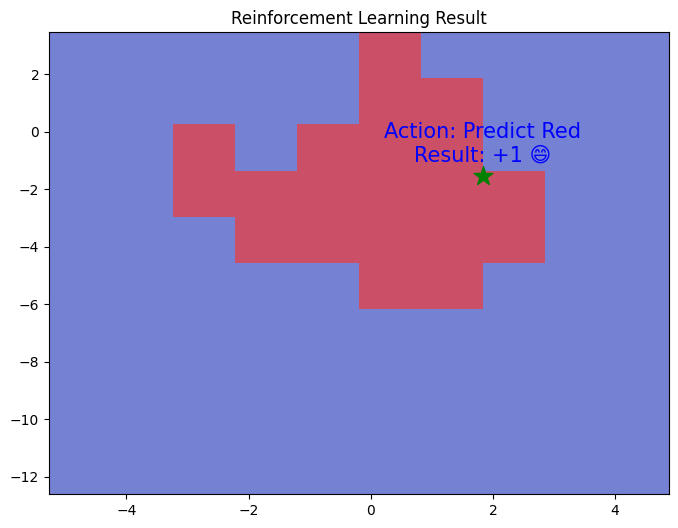

수많은 보상/벌점 경험으로 학습된 정책은,
처음 보는 상황에서도 보상을 받을 확률이 가장 높은 최적의 행동을 합니다.


In [56]:
# '실전 상황' 발생: 처음 보는 점 등장 (test 데이터에서 하나 선택)
test_case_pos = X_test[1]
test_case_label = y_test[1]

# 학습된 Q-테이블(정책)을 이용해 최적의 행동 결정
test_x_idx = np.digitize(test_case_pos[0], grid_x) - 1
test_y_idx = np.digitize(test_case_pos[1], grid_y) - 1
learned_action = np.argmax(q_table[test_x_idx, test_y_idx])

# 결과 시각화
fig, ax = plt.subplots(figsize=(8, 6))
# 학습된 정책 배경
ax.imshow(learned_policy.T, origin='lower',
          extent=[grid_x[0], grid_x[-1], grid_y[0], grid_y[-1]],
          aspect='auto', cmap='coolwarm', alpha=0.7)
# 실전 문제 위치
ax.scatter(test_case_pos[0], test_case_pos[1], c='green', s=200, marker='*')
ax.set_title("Reinforcement Learning Result")

if learned_action == test_case_label:
    reward_text, reward_color = "+1 😄", 'blue'
else:
    reward_text, reward_color = "-1 😥", 'red'

ax.text(test_case_pos[0], test_case_pos[1] + 0.5,
        f"Action: Predict {'Blue' if learned_action==0 else 'Red'}"
        +f"\nResult: {reward_text}",
        ha='center', fontsize=15, color=reward_color)
plt.show()

print("수많은 보상/벌점 경험으로 학습된 정책은,")
print(f"처음 보는 상황에서도 보상을 받을 확률이 가장 높은 최적의 행동을 합니다.")

## 📦 모듈 2.5: 머신러닝의 핵심, '모델'이란?

지금까지 지도, 비지도, 강화 학습을 보면서 '모델' 또는 '에이전트'라는 단어를 계속 사용했습니다.

머신러닝에서 모델은 가장 중요한 개념입니다.

- **모델(Model)의 간단한 정의**
  * **데이터의 패턴을 학습하여, 새로운 데이터에 대한 예측 또는 결정을 내리는 '규칙의 집합' 또는 '수학적 함수'** 입니다.

- **'판단 기준을 담은 상자'**
  - 이 상자(모델)에 **입력**(Input)으로 새로운 데이터를 넣으면,
  - 상자는 내부에 학습된 판단 기준(규칙)에 따라 **출력**(Output)으로 예측 결과를 뱉어냅니다.

- **머신러닝의 목표**
  1.  데이터를 가장 잘 설명하고 예측하는 **최적의 상자(모델)를 만듭니다.** (모델링)
  2.  이 상자 안의 판단 기준(파라미터)을 데이터로 **자동으로 조정합니다.** (학습/훈련, Training)
  3.  잘 만들어진 상자를 이용해 **미래의 데이터를 예측합니다.** (추론, Inference)

이제부터 우리는 '**선형 회귀**'(Linear Regression)라는 이름의,

세상에서 가장 간단한 '모델 상자'는 어떻게 생겼고 어떻게 학습하는지 알아볼 것입니다.

In [57]:
# '모델'을 간단한 파이썬 '함수'로 표현해 봅시다.
# 이 모델은 '공부 시간'을 입력받아 '시험 통과 여부'를 예측합니다.

def simple_pass_fail_model(study_hours):
  """
  이 함수 자체가 하나의 간단한 '모델'입니다.
  내부에는 '4시간 이상 공부하면 통과'라는 규칙(판단 기준)이 있습니다.
  """
  # 모델의 판단 기준 (Rule)
  if study_hours > 4:
    return "Pass"
  else:
    return "Fail"

# 모델 사용 예시 (추론, Inference)
new_student_A_hours = 7
new_student_B_hours = 3

prediction_A = simple_pass_fail_model(new_student_A_hours)
prediction_B = simple_pass_fail_model(new_student_B_hours)

print(f"학생 A (공부 시간: {new_student_A_hours}시간) -> 예측 결과: {prediction_A}")
print(f"학생 B (공부 시간: {new_student_B_hours}시간) -> 예측 결과: {prediction_B}")

학생 A (공부 시간: 7시간) -> 예측 결과: Pass
학생 B (공부 시간: 3시간) -> 예측 결과: Fail


## 📈 모듈 3: 나의 첫 머신러닝 모델 "선형 회귀"

### 왜 '선형(Linear)' 모델일까요?
- **가장 단순하고 직관적입니다**
  * 세상의 많은 현상들은 대체로 매우 복잡하지만,
  * 그 관계를 가장 단순한 형태인 '**직선**'으로 근사(approximate) 해보는 것은 모든 분석의 시작입니다.
- **해석이 쉽습니다**
  * 모델이 왜 그런 예측을 했는지 이해하기 가장 쉽습니다.
    * 예) "공부 시간이 1시간 늘면, 점수는 W점 오를 것이다"
- **모든 것의 기초입니다**
  * 이 단순한 모델을 이해하면, 나중에 배울 복잡한 딥러닝 모델들이 왜 그렇게 발전했는지 그 흐름을 파악할 수 있습니다.

### '선형'이라는 말은 우리가 중학교 때 배운 **1차 함수** $y = ax + b$ 와 똑같은 의미입니다.
(머신러닝에서는 변수 이름만 바꿔서 사용)
- 가설 (Hypothesis)
    * $ H(x) = Wx + b $
- 비용 함수 (Cost Function)
    * $ cost(W, b) = \frac{1}{m} \sum_{i=1}^{m} (H(x_i) - y_i)^2 $
- 목표
    * $cost(W,b)$를 최소로 만드는 $W$와 $b$ 찾기!

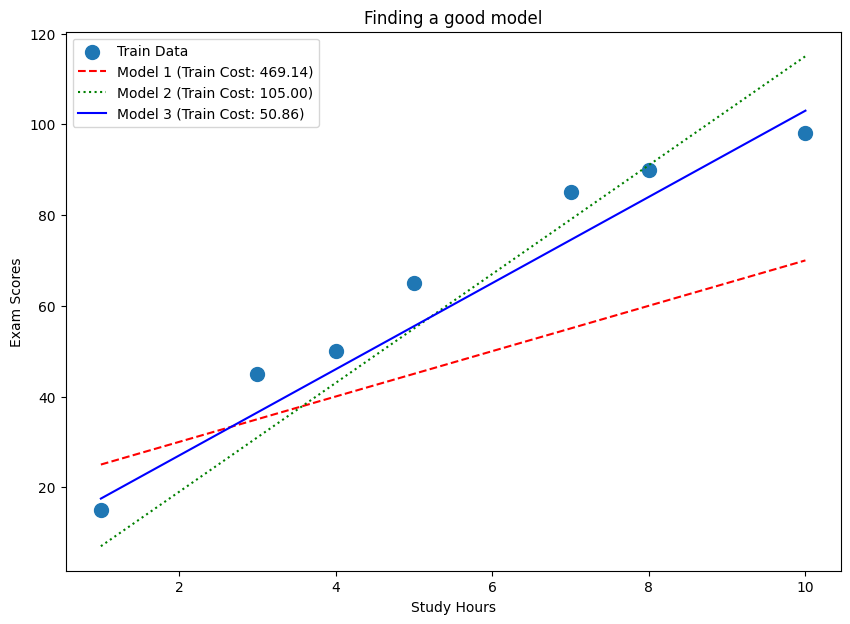

연습 문제에서는 모델 3의 Cost가 가장 낮으므로, 모델 3을 최종 모델로 선택합니다.


In [59]:
# 공부 시간에 따른 시험 성적 데이터 생성 및 분리
study_hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
exam_scores = np.array([15, 35, 45, 50, 65, 70, 85, 90, 92, 98])
(X_train_reg, X_test_reg,
 y_train_reg, y_test_reg) = train_test_split(study_hours,
                                             exam_scores,
                                             test_size=0.3,
                                             random_state=42)

# 후보 모델 3개 정의
W1, b1 = 5, 20  # 엉터리 모델
W2, b2 = 12, -5 # 그럭저럭 모델
W3, b3 = 9.5, 8 # 좋은 모델

# '연습 문제' 데이터로 각 모델의 비용(Cost) 계산
pred1_train = W1 * X_train_reg + b1
pred2_train = W2 * X_train_reg + b2
pred3_train = W3 * X_train_reg + b3
cost1_train = np.mean((pred1_train - y_train_reg)**2)
cost2_train = np.mean((pred2_train - y_train_reg)**2)
cost3_train = np.mean((pred3_train - y_train_reg)**2)

# '연습 문제'에 대한 시각화
plt.figure(figsize=(10, 7))
plt.scatter(X_train_reg, y_train_reg, label='Train Data', s=100)
plt.plot(study_hours, W1 * study_hours + b1,
         'r--', label=f'Model 1 (Train Cost: {cost1_train:.2f})')
plt.plot(study_hours, W2 * study_hours + b2,
         'g:', label=f'Model 2 (Train Cost: {cost2_train:.2f})')
plt.plot(study_hours, W3 * study_hours + b3,
         'b-', label=f'Model 3 (Train Cost: {cost3_train:.2f})')
plt.title("Finding a good model")
plt.xlabel("Study Hours")
plt.ylabel("Exam Scores")
plt.legend()
plt.show()
print("연습 문제에서는 모델 3의 Cost가 가장 낮으므로, 모델 3을 최종 모델로 선택합니다.")

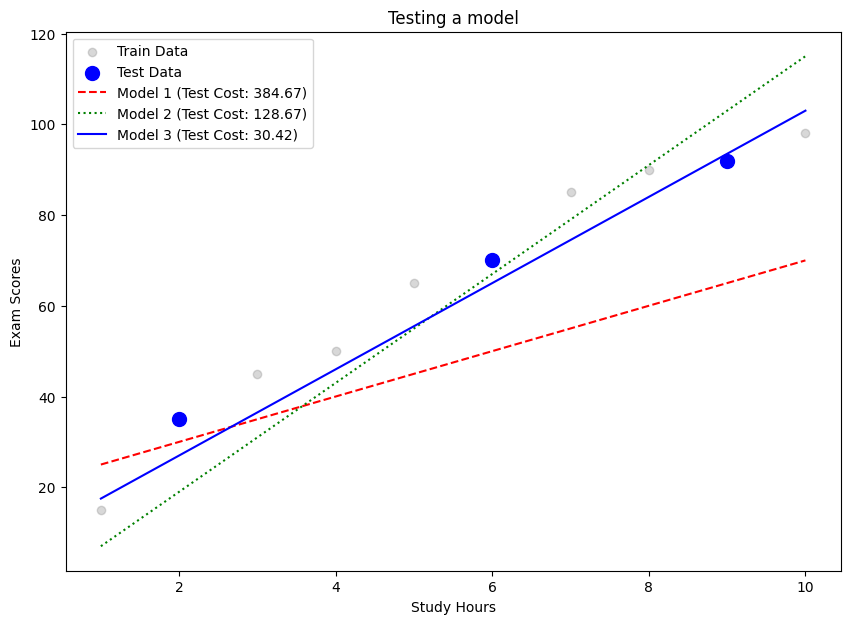

✨ 결과: 연습 문제에서 가장 좋았던 모델 3이,
처음 보는 실전 시험에서도 가장 낮은 Cost를 기록했습니다!

모델이 데이터를 '암기'한 것이 아니라, 관계를 '학습(일반화)'했다는 증거입니다.


In [64]:
# '실전 시험' 데이터로 각 모델의 비용(Cost) 계산
pred1_test = W1 * X_test_reg + b1
pred2_test = W2 * X_test_reg + b2
pred3_test = W3 * X_test_reg + b3
cost1_test = np.mean((pred1_test - y_test_reg)**2)
cost2_test = np.mean((pred2_test - y_test_reg)**2)
cost3_test = np.mean((pred3_test - y_test_reg)**2)

# '실전 시험'에 대한 시각화
plt.figure(figsize=(10, 7))
# '연습 문제'는 흐리게 배경으로 표시
plt.scatter(X_train_reg, y_train_reg,
            color='gray', alpha=0.3, label='Train Data')
# '실전 시험' 데이터는 진하게 표시
plt.scatter(X_test_reg, y_test_reg,
            color='blue', label='Test Data', s=100, zorder=5)

# 3개의 후보 직선을 그대로 가져와서 '실전 시험' 데이터와 비교
plt.plot(study_hours, W1 * study_hours + b1,
         'r--', label=f'Model 1 (Test Cost: {cost1_test:.2f})')
plt.plot(study_hours, W2 * study_hours + b2,
         'g:', label=f'Model 2 (Test Cost: {cost2_test:.2f})')
plt.plot(study_hours, W3 * study_hours + b3,
         'b-', label=f'Model 3 (Test Cost: {cost3_test:.2f})')
plt.title("Testing a model")
plt.xlabel("Study Hours")
plt.ylabel("Exam Scores")
plt.legend()
plt.show()

print("✨ 결과: 연습 문제에서 가장 좋았던 모델 3이,")
print(f"처음 보는 실전 시험에서도 가장 낮은 Cost를 기록했습니다!")
print("\n모델이 데이터를 '암기'한 것이 아니라, 관계를 '학습(일반화)'했다는 증거입니다.")